# Multiple_Linear_Regression_Bike_Sharing_Assignment #
_Submitted by Venkadesh Kannan_

### Problem Statement: ###
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

#### The company wants to know: ####

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
### Goal: ###

Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

#### Importing Libraries ####

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set it to convert scientific values
pd.options.display.float_format = '{:.2f}'.format 

# Regular expressions for string manipulation
import re

# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

# to print versions of packages
#!pip install print-versions # works for python >= 3.8
from print_versions import print_versions

# versions
import sys
import platform


#import zipfile module for taking the loan.csv
from zipfile import ZipFile

#installed pip install zipfile36
import zipfile36
import io



In [2]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


In [3]:
print(platform.python_version())
print_versions(globals())
import sklearn
print(sklearn.__version__)
import statsmodels 
print(statsmodels.__version__)


3.10.12
numpy==2.2.2
pandas==2.2.3
seaborn==0.13.2
re==2.2.1
platform==1.0.8
zipfile36==0.1.3
statsmodels==0.14.4
statsmodels.api==0.14.4
sklearn==1.6.1
1.6.1
0.14.4


#### Reading and Understanding the Data ####


In [4]:
url1="https://ml-course2-upgrad.s3.amazonaws.com/Linear+Regression+Assignment/Bike+Sharing+Assignment/day.csv"
bike1=pd.read_csv(url1)
bike1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [5]:
bike1.describe

<bound method NDFrame.describe of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit  temp  atemp   hum  windspeed  casual

In [6]:
bike1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,365.50,2.50,0.50,6.53,0.03,3.00,0.68,1.39,20.32,23.73,62.77,12.76,849.25,3658.76,4508.01
std,210.88,1.11,0.50,3.45,0.17,2.01,0.47,0.54,7.51,8.15,14.24,5.20,686.48,1559.76,1936.01
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,183.25,2.00,0.00,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,316.25,2502.25,3169.75
50%,365.50,3.00,0.50,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,717.00,3664.50,4548.50
75%,547.75,3.00,1.00,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,1096.50,4783.25,5966.00
max,730.00,4.00,1.00,12.00,1.00,6.00,1.00,3.00,35.33,42.04,97.25,34.00,3410.00,6946.00,8714.00


In [8]:
bike1.groupby('weathersit').size()

weathersit
1    463
2    246
3     21
dtype: int64

#### Pre processing steps ####

Drop columns that are not useful for analysis



In [9]:
# Droping instant column as it is index column which has nothing to do with target
bike1.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bike1.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

bike1.drop(['casual'], axis = 1, inplace = True)
bike1.drop(['registered'], axis = 1, inplace = True)

Convert to categorical types

In [10]:
bike1.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike1.weathersit.replace({1:'great',2:'good',3:'medium',4:'bad'},inplace = True)

bike1.mnth = bike1.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike1.weekday = bike1.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike1.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [11]:
bike1.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

#### EDA ####


Let us visualise our data using `matplotlib` and `seaborn`.

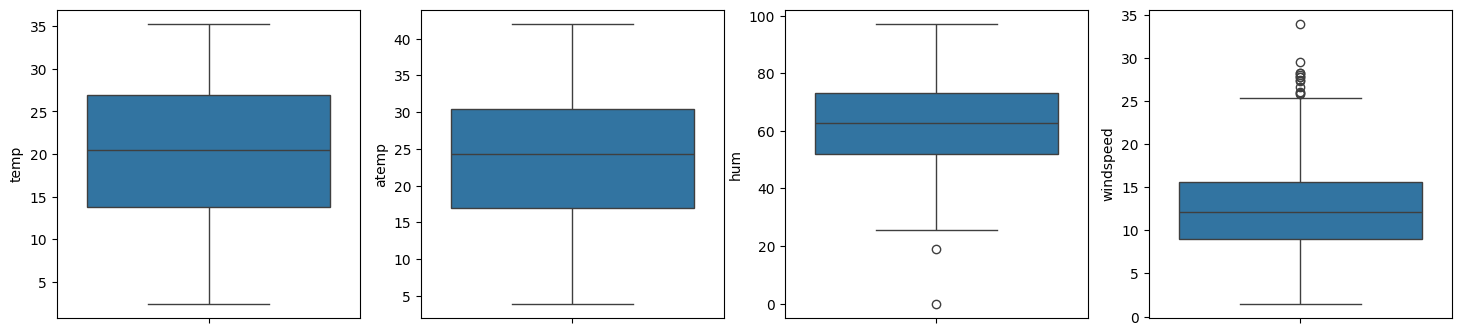

In [12]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike1)
    i+=1

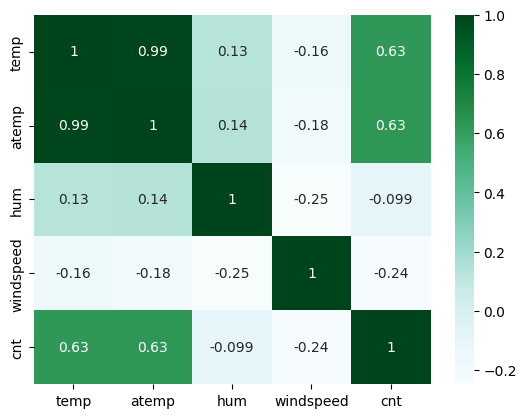

In [13]:
# Checking continuous variables relationship with each other
sns.heatmap(bike1[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

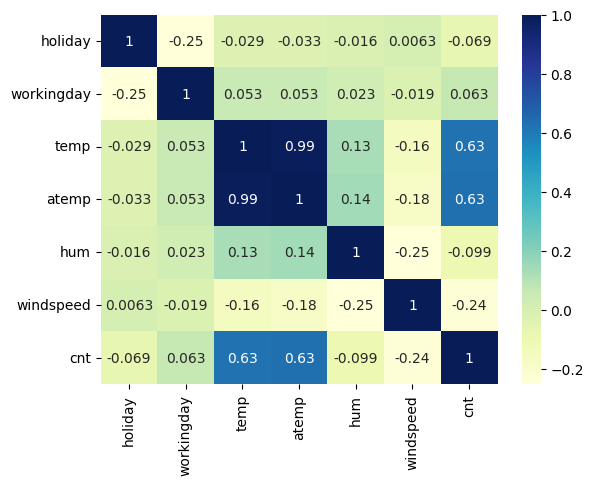

In [14]:
#Correlations for numeric variables
sns.heatmap(bike1[['holiday','workingday','temp','atemp','hum','windspeed','cnt']].corr(), cmap="YlGnBu", annot = True)
plt.show()

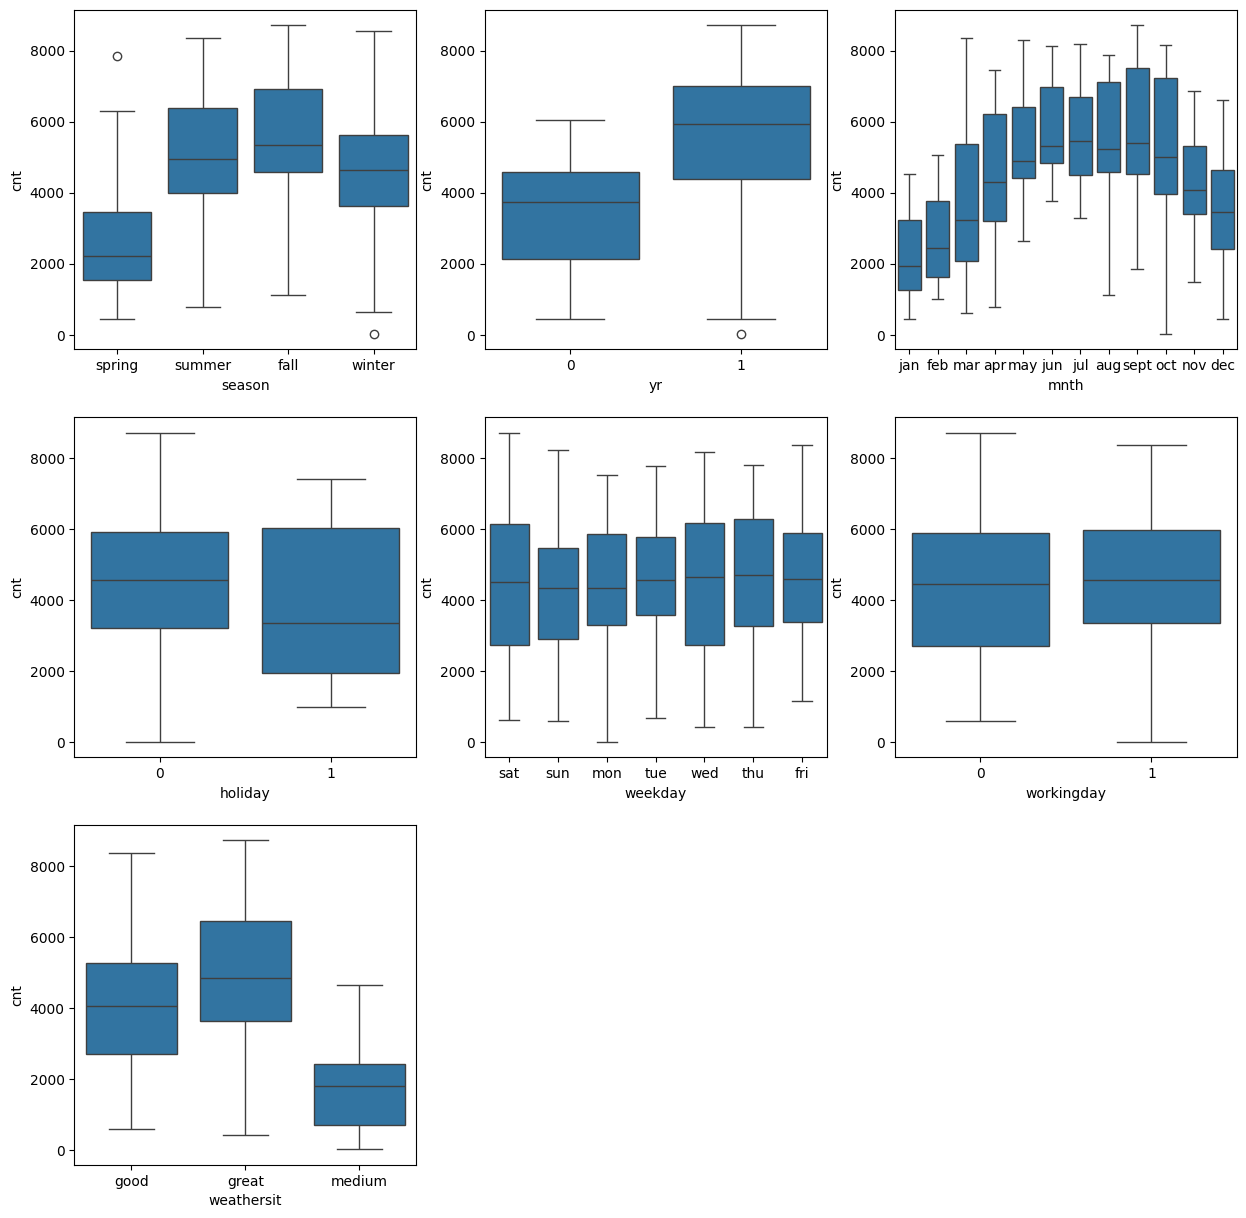

In [15]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike1, x=i[1], y='cnt')
plt.show()

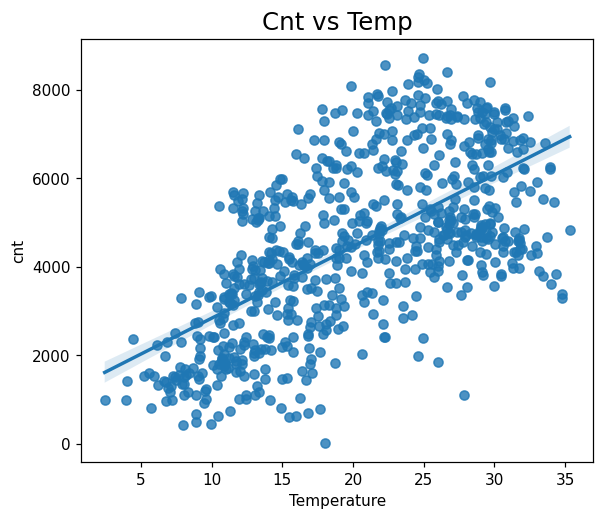

In [16]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bike1,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

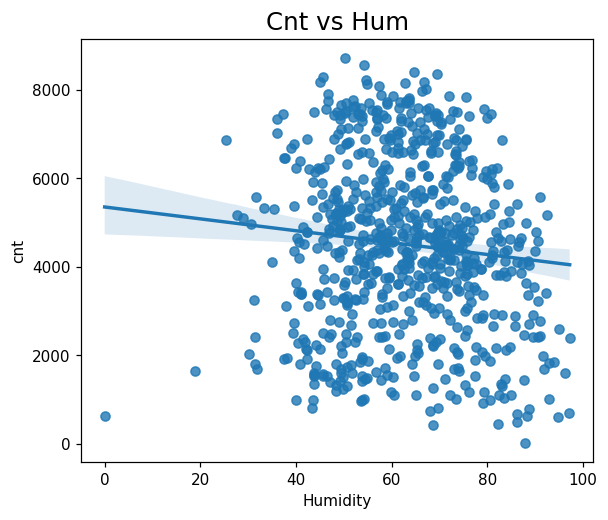

In [17]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bike1,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

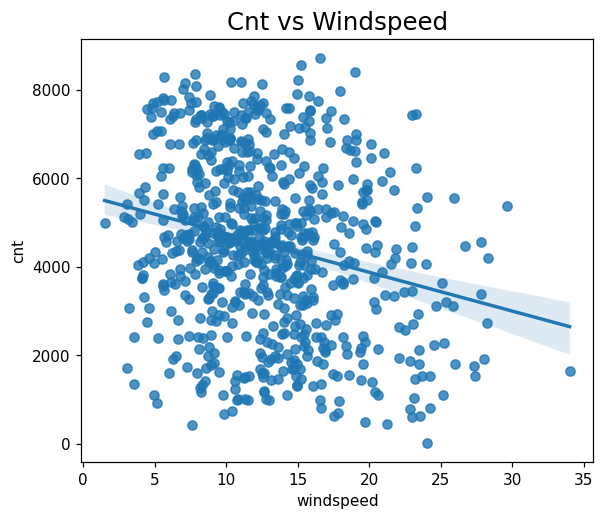

In [18]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bike1,y="cnt",x="windspeed")
plt.show()

<Figure size 1500x3000 with 0 Axes>

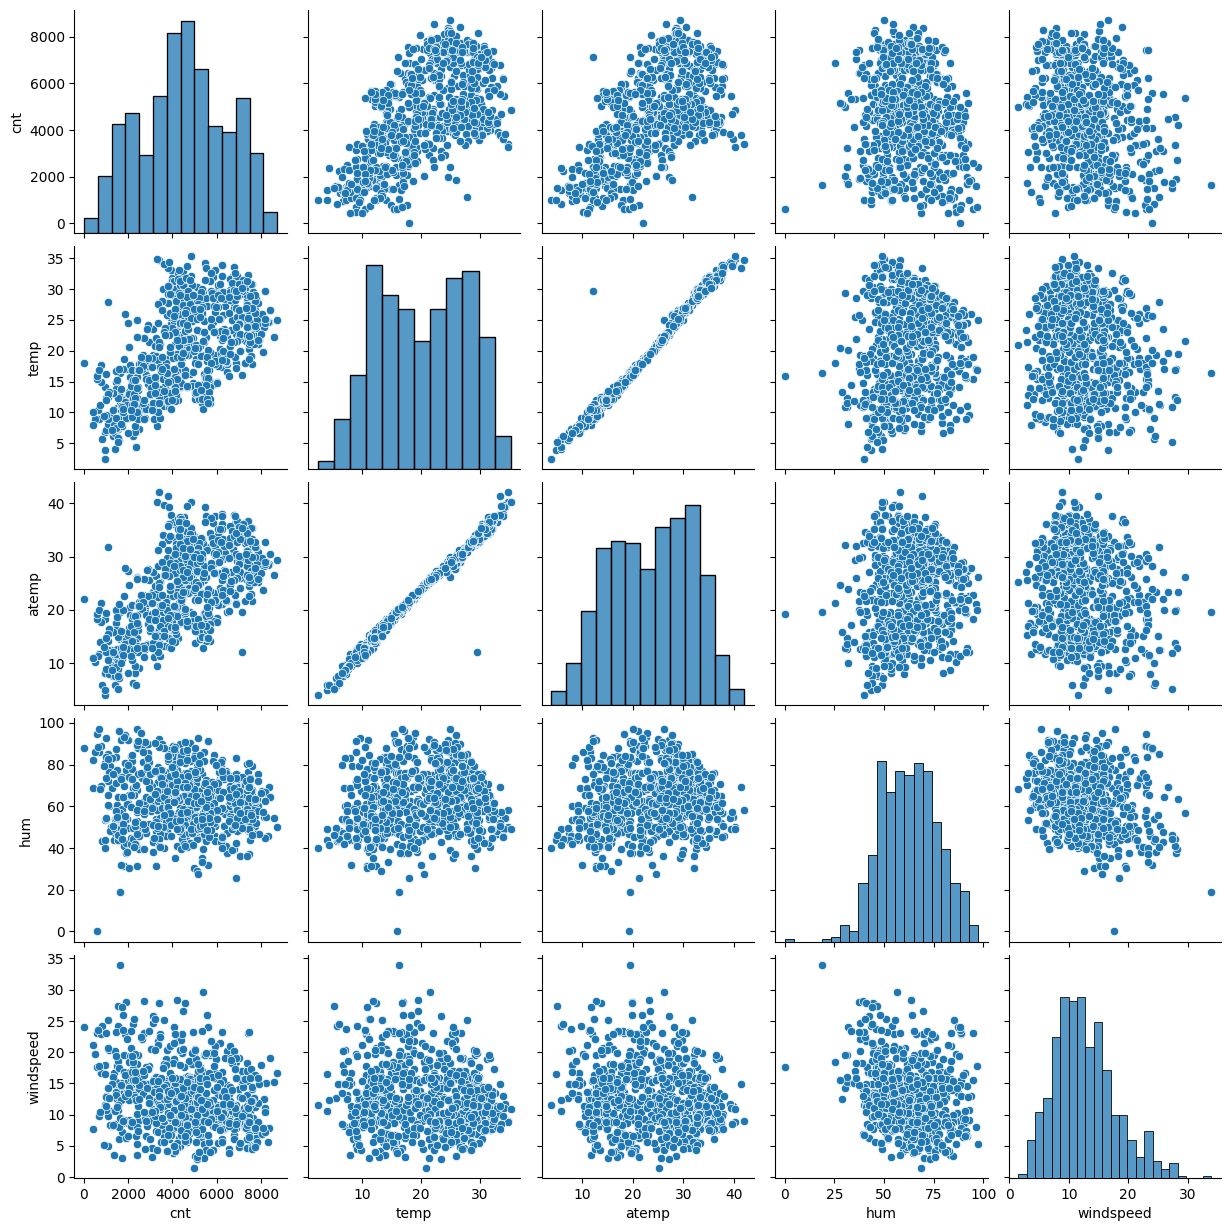

In [19]:

plt.figure(figsize = (15,30))
sns.pairplot(data=bike1, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

1. Spring is low and fall has high demand
2. 2019 has more demand than 2018
3. April to October has high demand
4. Dont see working day or holiday making major impact - need to review more.
5. The clear weathershit has highest demand

#### Scaling Variables


In [20]:

# Importing required library for scaling
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [21]:
# Create dummy variables for all categorical variables
bike1 = pd.get_dummies(data=bike1,columns=['season','mnth','weekday','weathersit'],dtype=int,drop_first=True)


In [22]:
# Let us scale continuous variables
cont_var = ['temp','atemp','hum','windspeed','cnt']

#Use Normalized scaler to scale
scaler = MinMaxScaler()



#### Splitting the Data into Training and Testing Sets ####



In [23]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [24]:
#Fit and transform train set
df_train[cont_var] = scaler.fit_transform(df_train[cont_var])

In [25]:
y_train=df_train.pop('cnt')
X_train=df_train

### RFE Modelling

In [26]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_great,weathersit_medium
653,1,0,1,0.51,0.50,0.58,0.30,0,0,1,...,1,0,0,0,0,0,1,0,1,0
576,1,0,1,0.82,0.77,0.73,0.26,0,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.44,0.44,0.64,0.26,1,0,0,...,0,0,0,1,0,0,0,0,0,0
728,1,0,0,0.25,0.20,0.50,0.66,1,0,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.40,0.39,0.50,0.19,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [27]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [29]:
#Columns auto selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('workingday', np.True_, np.int64(1)),
 ('temp', np.True_, np.int64(1)),
 ('atemp', np.False_, np.int64(5)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('season_spring', np.True_, np.int64(1)),
 ('season_summer', np.True_, np.int64(1)),
 ('season_winter', np.True_, np.int64(1)),
 ('mnth_aug', np.False_, np.int64(7)),
 ('mnth_dec', np.False_, np.int64(3)),
 ('mnth_feb', np.False_, np.int64(4)),
 ('mnth_jan', np.True_, np.int64(1)),
 ('mnth_jul', np.True_, np.int64(1)),
 ('mnth_jun', np.False_, np.int64(14)),
 ('mnth_mar', np.False_, np.int64(15)),
 ('mnth_may', np.False_, np.int64(6)),
 ('mnth_nov', np.False_, np.int64(2)),
 ('mnth_oct', np.False_, np.int64(11)),
 ('mnth_sept', np.True_, np.int64(1)),
 ('weekday_mon', np.False_, np.int64(9)),
 ('weekday_sat', np.True_, np.int64(1)),
 ('weekday_sun', np.False_, np.int64(8)),
 ('weekday_thu', np.False_, np.int64(12)),
 ('weekday_tue', np.Fa

In [30]:
col1 = X_train.columns[rfe.support_]
col1

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_great',
       'weathersit_medium'],
      dtype='object')

In [31]:
X_train_rfe = X_train[col1]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train.astype(float), X_train_rfe.astype(float)).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.31e-191
Time:                        13:16:37   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1932      0.04

### Manual Method

In [32]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm).fit()

In [33]:
lr1.params

const   0.16
atemp   0.68
dtype: float64

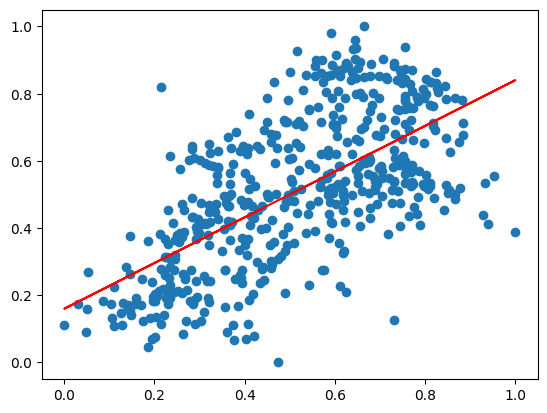

In [34]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], .16 + .68*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [35]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Wed, 29 Jan 2025   Prob (F-statistic):           1.10e-61
Time:                        13:16:37   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

In [36]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.astype(float).columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.astype(float).values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,6.85
1,atemp,1.00


### Adding another variable
trying to do better

In [37]:
# Adding hum
X_train_lm = X_train[['hum', 'atemp']]

In [38]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr2 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

lr2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     205.3
Date:                Wed, 29 Jan 2025   Prob (F-statistic):           4.74e-66
Time:                        13:16:37   Log-Likelihood:                 189.81
No. Observations:                 510   AIC:                            -373.6
Df Residuals:                     507   BIC:                            -360.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3217      0.036      8.910      0.000       0.251       0.393
hum           -0.2687      0.052     -5.211      0.000      -0.370      -0.167
atemp          0.7149      0.035     20.184      0.000       0.645       0.785
==============================================================================
Omnibus:                        1.079   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.583   Jarque-Bera (JB):                1.150
Skew:                           0.065   Prob(JB):                        0.563
Kurtosis:                       2.807   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.astype(float).columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.astype(float).values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,23.76
1,hum,1.03
2,atemp,1.03


In [40]:

# Build a linear model

X_train_lm = X_train[['hum', 'atemp','windspeed']]

X_train_lm = sm.add_constant(X_train_lm)

lr3 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     152.1
Date:                Wed, 29 Jan 2025   Prob (F-statistic):           2.90e-70
Time:                        13:16:37   Log-Likelihood:                 202.43
No. Observations:                 510   AIC:                            -396.9
Df Residuals:                     506   BIC:                            -379.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4520      0.044     10.357      0.000       0.366       0.538
hum           -0.3316      0.052     -6.394      0.000      -0.434      -0.230
atemp          0.6830      0.035     19.428      0.000       0.614       0.752
windspeed     -0.2278      0.045     -5.066      0.000      -0.316      -0.139
==============================================================================
Omnibus:                        1.351   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.509   Jarque-Bera (JB):                1.435
Skew:                           0.097   Prob(JB):                        0.488
Kurtosis:                       2.827   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
X_train_lm = X_train[['hum', 'atemp','windspeed','yr']]

X_train_lm = sm.add_constant(X_train_lm)

lr4 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     351.3
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.38e-144
Time:                        13:16:37   Log-Likelihood:                 377.77
No. Observations:                 510   AIC:                            -745.5
Df Residuals:                     505   BIC:                            -724.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3125      0.032      9.890      0.000       0.250       0.375
hum           -0.2471      0.037     -6.677      0.000      -0.320      -0.174
atemp          0.6166      0.025     24.537      0.000       0.567       0.666
windspeed     -0.2256      0.032     -7.067      0.000      -0.288      -0.163
yr             0.2320      0.010     22.348      0.000       0.212       0.252
==============================================================================
Omnibus:                       25.229   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.565
Skew:                          -0.421   Prob(JB):                     3.12e-08
Kurtosis:                       3.959   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Adding season

X_train_lm = X_train[['hum', 'atemp','windspeed','yr','season_spring',
       'season_summer', 'season_winter']]

X_train_lm = sm.add_constant(X_train_lm)

lr5 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     275.6
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.87e-167
Time:                        13:16:37   Log-Likelihood:                 440.78
No. Observations:                 510   AIC:                            -865.6
Df Residuals:                     502   BIC:                            -831.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3766      0.037     10.167      0.000       0.304       0.449
hum              -0.3121      0.034     -9.318      0.000      -0.378      -0.246
atemp             0.5503      0.038     14.631      0.000       0.476       0.624
windspeed        -0.2144      0.029     -7.478      0.000      -0.271      -0.158
yr                0.2319      0.009     25.152      0.000       0.214       0.250
season_spring    -0.0798      0.022     -3.710      0.000      -0.122      -0.038
season_summer     0.0370      0.015      2.519      0.012       0.008       0.066
season_winter     0.0766      0.018      4.378      0.000       0.042       0.111
==============================================================================
Omnibus:                       91.190   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              264.499
Skew:                          -0.853   Prob(JB):                     3.67e-58
Kurtosis:                       6.089   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
X_train.dtypes

yr                     int64
holiday                int64
workingday             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
season_spring          int64
season_summer          int64
season_winter          int64
mnth_aug               int64
mnth_dec               int64
mnth_feb               int64
mnth_jan               int64
mnth_jul               int64
mnth_jun               int64
mnth_mar               int64
mnth_may               int64
mnth_nov               int64
mnth_oct               int64
mnth_sept              int64
weekday_mon            int64
weekday_sat            int64
weekday_sun            int64
weekday_thu            int64
weekday_tue            int64
weekday_wed            int64
weathersit_great       int64
weathersit_medium      int64
dtype: object

In [44]:
# Adding weather situation

X_train_lm = X_train[['hum', 'atemp','windspeed','yr','season_spring',
       'season_summer', 'season_winter','weathersit_great','weathersit_medium']]

X_train_lm = sm.add_constant(X_train_lm)

lr6 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     253.1
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          7.26e-180
Time:                        13:16:37   Log-Likelihood:                 475.78
No. Observations:                 510   AIC:                            -931.6
Df Residuals:                     500   BIC:                            -889.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2577      0.040      6.504      0.000       0.180       0.335
hum                  -0.1398      0.040     -3.496      0.001      -0.218      -0.061
atemp                 0.4962      0.036     13.754      0.000       0.425       0.567
windspeed            -0.1657      0.027     -6.043      0.000      -0.220      -0.112
yr                    0.2324      0.009     26.886      0.000       0.215       0.249
season_spring        -0.0975      0.020     -4.816      0.000      -0.137      -0.058
season_summer         0.0282      0.014      2.048      0.041       0.001       0.055
season_winter         0.0660      0.016      4.001      0.000       0.034       0.098
weathersit_great      0.0529      0.011      4.724      0.000       0.031       0.075
weathersit_medium    -0.1805      0.027     -6.780      0.000      -0.233      -0.128
==============================================================================
Omnibus:                       75.241   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.301
Skew:                          -0.702   Prob(JB):                     2.40e-48
Kurtosis:                       5.889   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Adding months

X_train_lm = X_train[['hum', 'atemp','windspeed','yr','season_spring',
       'season_summer', 'season_winter','weathersit_great','weathersit_medium','mnth_aug', 'mnth_dec', 'mnth_feb','mnth_jan','mnth_jul','mnth_jun','mnth_mar','mnth_may','mnth_nov','mnth_oct','mnth_sept']]

X_train_lm = sm.add_constant(X_train_lm)

lr7 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

lr7.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     129.5
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          9.52e-181
Time:                        13:16:37   Log-Likelihood:                 507.67
No. Observations:                 510   AIC:                            -973.3
Df Residuals:                     489   BIC:                            -884.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2932      0.047      6.253      0.000       0.201       0.385
hum                  -0.1624      0.039     -4.114      0.000      -0.240      -0.085
atemp                 0.4193      0.046      9.057      0.000       0.328       0.510
windspeed            -0.1708      0.027     -6.439      0.000      -0.223      -0.119
yr                    0.2334      0.008     28.214      0.000       0.217       0.250
season_spring        -0.0556      0.031     -1.803      0.072      -0.116       0.005
season_summer         0.0312      0.027      1.158      0.247      -0.022       0.084
season_winter         0.1042      0.029      3.637      0.000       0.048       0.161
weathersit_great      0.0563      0.011      5.268      0.000       0.035       0.077
weathersit_medium    -0.1845      0.026     -7.206      0.000      -0.235      -0.134
mnth_aug              0.0441      0.034      1.291      0.197      -0.023       0.111
mnth_dec             -0.0537      0.034     -1.561      0.119      -0.121       0.014
mnth_feb             -0.0437      0.034     -1.294      0.196      -0.110       0.023
mnth_jan             -0.0727      0.034     -2.117      0.035      -0.140      -0.005
mnth_jul             -0.0172      0.036     -0.484      0.629      -0.087       0.053
mnth_jun              0.0218      0.025      0.869      0.385      -0.027       0.071
mnth_mar              0.0050      0.025      0.198      0.843      -0.045       0.055
mnth_may              0.0401      0.021      1.877      0.061      -0.002       0.082
mnth_nov             -0.0574      0.037     -1.543      0.124      -0.130       0.016
mnth_oct              0.0018      0.037      0.050      0.960      -0.071       0.074
mnth_sept             0.0932      0.033      2.836      0.005       0.029       0.158
==============================================================================
Omnibus:                       86.794   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.609
Skew:                          -0.790   Prob(JB):                     4.70e-59
Kurtosis:                       6.184   Cond. No.                         36.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Training with all variables once before starting elimination
X_train_lm = X_train[['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
        'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_great','weathersit_medium']]

X_train_lm = sm.add_constant(X_train_lm)

lr8 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

lr8.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          8.42e-181
Time:                        13:16:37   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1964      0.037      5.256      0.000       0.123       0.270
yr                    0.2322      0.008     28.792      0.000       0.216       0.248
holiday              -0.0015      0.024     -0.062      0.950      -0.049       0.046
workingday            0.0848      0.013      6.774      0.000       0.060       0.109
temp                  0.4013      0.142      2.821      0.005       0.122       0.681
atemp                 0.0506      0.138      0.366      0.714      -0.221       0.322
hum                  -0.1518      0.039     -3.940      0.000      -0.228      -0.076
windspeed            -0.1844      0.026     -7.003      0.000      -0.236      -0.133
season_spring        -0.0486      0.030     -1.618      0.106      -0.108       0.010
season_summer         0.0382      0.026      1.455      0.146      -0.013       0.090
season_winter         0.1054      0.028      3.770      0.000       0.050       0.160
mnth_aug              0.0161      0.034      0.473      0.637      -0.051       0.083
mnth_dec             -0.0456      0.034     -1.356      0.176      -0.112       0.020
mnth_feb             -0.0322      0.033     -0.978      0.329      -0.097       0.032
mnth_jan             -0.0626      0.034     -1.864      0.063      -0.129       0.003
mnth_jul             -0.0393      0.035     -1.116      0.265      -0.108       0.030
mnth_jun             -0.0017      0.025     -0.067      0.946      -0.051       0.048
mnth_mar              0.0013      0.025      0.052      0.958      -0.047       0.050
mnth_may              0.0247      0.021      1.169      0.243      -0.017       0.066
mnth_nov             -0.0418      0.036     -1.149      0.251      -0.113       0.030
mnth_oct              0.0077      0.036      0.215      0.830      -0.063       0.078
mnth_sept             0.0818      0.032      2.549      0.011       0.019       0.145
weekday_mon          -0.0215      0.015     -1.395      0.164      -0.052       0.009
weekday_sat           0.0839      0.014      5.959      0.000       0.056       0.112
weekday_sun           0.0293      0.014      2.031      0.043       0.001       0.058
weekday_thu          -0.0097      0.016     -0.625      0.532      -0.040       0.021
weekday_tue          -0.0193      0.016     -1.242      0.215      -0.050       0.011
weekday_wed          -0.0057      0.015     -0.384      0.701      -0.035       0.024
weathersit_great      0.0610      0.010      5.845      0.000       0.041       0.082
weathersit_medium    -0.1957      0.025     -7.810      0.000      -0.245      -0.146
==============================================================================
Omnibus:                       85.143   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.880
Skew:   

In [47]:
lr8.params

const                0.20
yr                   0.23
holiday             -0.00
workingday           0.08
temp                 0.40
atemp                0.05
hum                 -0.15
windspeed           -0.18
season_spring       -0.05
season_summer        0.04
season_winter        0.11
mnth_aug             0.02
mnth_dec            -0.05
mnth_feb            -0.03
mnth_jan            -0.06
mnth_jul            -0.04
mnth_jun            -0.00
mnth_mar             0.00
mnth_may             0.02
mnth_nov            -0.04
mnth_oct             0.01
mnth_sept            0.08
weekday_mon         -0.02
weekday_sat          0.08
weekday_sun          0.03
weekday_thu         -0.01
weekday_tue         -0.02
weekday_wed         -0.01
weathersit_great     0.06
weathersit_medium   -0.20
dtype: float64

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [48]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.astype(float).columns
vif['VIF'] = [variance_inflation_factor(X_train.astype(float).values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,95.31
3,temp,67.12
4,atemp,56.09
22,weekday_sat,22.08
23,weekday_sun,20.76
7,season_spring,10.80
9,season_winter,9.52
8,season_summer,8.31
18,mnth_nov,6.80
19,mnth_oct,6.59


In [50]:
# Dropping VIF above 5 and high p value
# Dropping temp
X_train_lm = X_train[['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
        'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_great','weathersit_medium']]

X_train_lm = sm.add_constant(X_train_lm)

lr9 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

lr9.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          4.12e-180
Time:                        13:16:37   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     482   BIC:                            -873.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2116      0.037      5.681      0.000       0.138       0.285
yr                    0.2342      0.008     28.937      0.000       0.218       0.250
holiday               0.0088      0.024      0.364      0.716      -0.039       0.056
workingday            0.0886      0.013      7.074      0.000       0.064       0.113
atemp                 0.4195      0.045      9.248      0.000       0.330       0.509
hum                  -0.1456      0.039     -3.758      0.000      -0.222      -0.069
windspeed            -0.1686      0.026     -6.506      0.000      -0.219      -0.118
season_spring        -0.0551      0.030     -1.826      0.068      -0.114       0.004
season_summer         0.0308      0.026      1.171      0.242      -0.021       0.083
season_winter         0.0998      0.028      3.553      0.000       0.045       0.155
mnth_aug              0.0369      0.033      1.103      0.270      -0.029       0.103
mnth_dec             -0.0540      0.034     -1.603      0.110      -0.120       0.012
mnth_feb             -0.0405      0.033     -1.226      0.221      -0.105       0.024
mnth_jan             -0.0734      0.034     -2.187      0.029      -0.139      -0.007
mnth_jul             -0.0201      0.035     -0.578      0.563      -0.088       0.048
mnth_jun              0.0178      0.025      0.726      0.468      -0.030       0.066
mnth_mar             -0.0006      0.025     -0.026      0.979      -0.049       0.048
mnth_may              0.0358      0.021      1.716      0.087      -0.005       0.077
mnth_nov             -0.0477      0.037     -1.303      0.193      -0.120       0.024
mnth_oct              0.0078      0.036      0.216      0.829      -0.063       0.079
mnth_sept             0.0915      0.032      2.846      0.005       0.028       0.155
weekday_mon          -0.0263      0.015     -1.707      0.089      -0.057       0.004
weekday_sat           0.0844      0.014      5.958      0.000       0.057       0.112
weekday_sun           0.0297      0.015      2.044      0.041       0.001       0.058
weekday_thu          -0.0132      0.016     -0.843      0.399      -0.044       0.018
weekday_tue          -0.0222      0.016     -1.418      0.157      -0.053       0.009
weekday_wed          -0.0081      0.015     -0.540      0.589      -0.038       0.021
weathersit_great      0.0626      0.011      5.961      0.000       0.042       0.083
weathersit_medium    -0.1919      0.025     -7.617      0.000      -0.241      -0.142
==============================================================================
Omnibus:                       86.243   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.880
Skew:                          -0.790   Prob(JB):                     8.25e-58
Kurtosis:      

In [51]:
# Dropping Oct

# Dropping temp
X_train_lm = X_train[['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
        'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_great','weathersit_medium']]

X_train_lm = sm.add_constant(X_train_lm)

lr10 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

lr10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     106.0
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          4.05e-181
Time:                        13:16:37   Log-Likelihood:                 523.82
No. Observations:                 510   AIC:                            -993.6
Df Residuals:                     483   BIC:                            -879.3
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2142      0.035      6.079      0.000       0.145       0.283
yr                    0.2341      0.008     28.981      0.000       0.218       0.250
holiday               0.0097      0.024      0.406      0.685      -0.037       0.057
workingday            0.0892      0.012      7.278      0.000       0.065       0.113
atemp                 0.4192      0.045      9.255      0.000       0.330       0.508
hum                  -0.1446      0.038     -3.763      0.000      -0.220      -0.069
windspeed            -0.1686      0.026     -6.512      0.000      -0.219      -0.118
season_spring        -0.0551      0.030     -1.829      0.068      -0.114       0.004
season_summer         0.0284      0.024      1.193      0.234      -0.018       0.075
season_winter         0.1028      0.024      4.198      0.000       0.055       0.151
mnth_aug              0.0333      0.029      1.148      0.251      -0.024       0.090
mnth_dec             -0.0599      0.020     -2.957      0.003      -0.100      -0.020
mnth_feb             -0.0442      0.028     -1.562      0.119      -0.100       0.011
mnth_jan             -0.0771      0.029     -2.678      0.008      -0.134      -0.021
mnth_jul             -0.0237      0.031     -0.771      0.441      -0.084       0.037
mnth_jun              0.0158      0.023      0.697      0.486      -0.029       0.060
mnth_mar             -0.0034      0.021     -0.162      0.872      -0.045       0.038
mnth_may              0.0346      0.020      1.726      0.085      -0.005       0.074
mnth_nov             -0.0544      0.019     -2.805      0.005      -0.092      -0.016
mnth_sept             0.0871      0.025      3.477      0.001       0.038       0.136
weekday_mon          -0.0264      0.015     -1.711      0.088      -0.057       0.004
weekday_sat           0.0850      0.014      6.119      0.000       0.058       0.112
weekday_sun           0.0303      0.014      2.122      0.034       0.002       0.058
weekday_thu          -0.0132      0.016     -0.842      0.400      -0.044       0.018
weekday_tue          -0.0222      0.016     -1.421      0.156      -0.053       0.008
weekday_wed          -0.0081      0.015     -0.541      0.589      -0.038       0.021
weathersit_great      0.0627      0.010      5.977      0.000       0.042       0.083
weathersit_medium    -0.1917      0.025     -7.622      0.000      -0.241      -0.142
==============================================================================
Omnibus:                       85.543   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.739
Skew:                          -0.785   Prob(JB):                     3.97e-57
Kurtosis:                       6.124   Cond. No.                     6.86e+15
======================

In [52]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.astype(float).columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.astype(float).values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,workingday,inf
2,holiday,inf
21,weekday_sat,inf
22,weekday_sun,inf
7,season_spring,10.74
9,season_winter,7.21
8,season_summer,6.76
4,atemp,5.94
10,mnth_aug,4.70
13,mnth_jan,4.29


In [53]:
# Dropping Holiday

X_train_lm = X_train[['yr', 'workingday', 'atemp', 'hum', 'windspeed',
        'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_great','weathersit_medium']]

X_train_lm = sm.add_constant(X_train_lm)

lr11 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

lr11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          4.12e-180
Time:                        13:16:37   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     482   BIC:                            -873.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2204      0.054      4.082      0.000       0.114       0.326
yr                    0.2342      0.008     28.937      0.000       0.218       0.250
workingday            0.0798      0.027      2.982      0.003       0.027       0.132
atemp                 0.4195      0.045      9.248      0.000       0.330       0.509
hum                  -0.1456      0.039     -3.758      0.000      -0.222      -0.069
windspeed            -0.1686      0.026     -6.506      0.000      -0.219      -0.118
season_spring        -0.0551      0.030     -1.826      0.068      -0.114       0.004
season_summer         0.0308      0.026      1.171      0.242      -0.021       0.083
season_winter         0.0998      0.028      3.553      0.000       0.045       0.155
mnth_aug              0.0369      0.033      1.103      0.270      -0.029       0.103
mnth_dec             -0.0540      0.034     -1.603      0.110      -0.120       0.012
mnth_feb             -0.0405      0.033     -1.226      0.221      -0.105       0.024
mnth_jan             -0.0734      0.034     -2.187      0.029      -0.139      -0.007
mnth_jul             -0.0201      0.035     -0.578      0.563      -0.088       0.048
mnth_jun              0.0178      0.025      0.726      0.468      -0.030       0.066
mnth_mar             -0.0006      0.025     -0.026      0.979      -0.049       0.048
mnth_may              0.0358      0.021      1.716      0.087      -0.005       0.077
mnth_nov             -0.0477      0.037     -1.303      0.193      -0.120       0.024
mnth_oct              0.0078      0.036      0.216      0.829      -0.063       0.079
mnth_sept             0.0915      0.032      2.846      0.005       0.028       0.155
weekday_mon          -0.0263      0.015     -1.707      0.089      -0.057       0.004
weekday_sat           0.0756      0.030      2.496      0.013       0.016       0.135
weekday_sun           0.0209      0.030      0.689      0.491      -0.039       0.081
weekday_thu          -0.0132      0.016     -0.843      0.399      -0.044       0.018
weekday_tue          -0.0222      0.016     -1.418      0.157      -0.053       0.009
weekday_wed          -0.0081      0.015     -0.540      0.589      -0.038       0.021
weathersit_great      0.0626      0.011      5.961      0.000       0.042       0.083
weathersit_medium    -0.1919      0.025     -7.617      0.000      -0.241      -0.142
==============================================================================
Omnibus:                       86.243   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.880
Skew:                          -0.790   Prob(JB):                     8.25e-58
Kurtosis:                       6.142   Cond. No.                         40.6
======================

In [54]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.astype(float).columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.astype(float).values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,187.15
6,season_spring,10.74
2,workingday,10.07
8,season_winter,9.47
7,season_summer,8.23
21,weekday_sat,7.72
22,weekday_sun,7.26
17,mnth_nov,6.77
18,mnth_oct,6.59
9,mnth_aug,6.24


In [55]:
# Dropping Mar, oct and wednesday

X_train_lm = X_train[['yr', 'workingday', 'atemp', 'hum', 'windspeed',
        'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_may', 'mnth_nov',  'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weathersit_great','weathersit_medium']]

X_train_lm = sm.add_constant(X_train_lm)

lr12 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

lr12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     115.2
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          4.12e-183
Time:                        13:16:37   Log-Likelihood:                 523.65
No. Observations:                 510   AIC:                            -997.3
Df Residuals:                     485   BIC:                            -891.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2200      0.051      4.346      0.000       0.121       0.320
yr                    0.2340      0.008     29.028      0.000       0.218       0.250
workingday            0.0788      0.027      2.962      0.003       0.027       0.131
atemp                 0.4197      0.045      9.425      0.000       0.332       0.507
hum                  -0.1455      0.038     -3.797      0.000      -0.221      -0.070
windspeed            -0.1683      0.026     -6.530      0.000      -0.219      -0.118
season_spring        -0.0573      0.028     -2.061      0.040      -0.112      -0.003
season_summer         0.0279      0.024      1.174      0.241      -0.019       0.075
season_winter         0.1029      0.024      4.229      0.000       0.055       0.151
mnth_aug              0.0339      0.029      1.179      0.239      -0.023       0.090
mnth_dec             -0.0584      0.018     -3.198      0.001      -0.094      -0.023
mnth_feb             -0.0412      0.022     -1.901      0.058      -0.084       0.001
mnth_jan             -0.0743      0.022     -3.425      0.001      -0.117      -0.032
mnth_jul             -0.0229      0.030     -0.751      0.453      -0.083       0.037
mnth_jun              0.0163      0.022      0.730      0.466      -0.027       0.060
mnth_may              0.0355      0.019      1.839      0.066      -0.002       0.073
mnth_nov             -0.0542      0.019     -2.866      0.004      -0.091      -0.017
mnth_sept             0.0875      0.025      3.537      0.000       0.039       0.136
weekday_mon          -0.0220      0.013     -1.690      0.092      -0.047       0.004
weekday_sat           0.0791      0.029      2.707      0.007       0.022       0.136
weekday_sun           0.0245      0.029      0.836      0.404      -0.033       0.082
weekday_thu          -0.0087      0.013     -0.663      0.507      -0.035       0.017
weekday_tue          -0.0177      0.013     -1.342      0.180      -0.044       0.008
weathersit_great      0.0623      0.010      5.966      0.000       0.042       0.083
weathersit_medium    -0.1930      0.025     -7.727      0.000      -0.242      -0.144
==============================================================================
Omnibus:                       84.474   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.836
Skew:                          -0.776   Prob(JB):                     2.79e-56
Kurtosis:                       6.103   Cond. No.                         31.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
#Dropping thursday and June

# Dropping Mar, oct and wednesday

X_train_lm = X_train[['yr', 'workingday', 'atemp', 'hum', 'windspeed',
        'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul',
       'mnth_may', 'mnth_nov',  'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_tue', 'weathersit_great','weathersit_medium']]

X_train_lm = sm.add_constant(X_train_lm)

lr13 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

lr13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     125.9
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          5.38e-185
Time:                        13:16:37   Log-Likelihood:                 523.12
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     487   BIC:                            -902.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2187      0.050      4.350      0.000       0.120       0.317
yr                    0.2336      0.008     29.091      0.000       0.218       0.249
workingday            0.0805      0.027      3.039      0.003       0.028       0.133
atemp                 0.4349      0.039     11.145      0.000       0.358       0.512
hum                  -0.1484      0.038     -3.902      0.000      -0.223      -0.074
windspeed            -0.1697      0.026     -6.612      0.000      -0.220      -0.119
season_spring        -0.0638      0.026     -2.419      0.016      -0.116      -0.012
season_summer         0.0243      0.023      1.051      0.294      -0.021       0.070
season_winter         0.0965      0.022      4.301      0.000       0.052       0.141
mnth_aug              0.0223      0.024      0.940      0.348      -0.024       0.069
mnth_dec             -0.0576      0.018     -3.175      0.002      -0.093      -0.022
mnth_feb             -0.0389      0.022     -1.811      0.071      -0.081       0.003
mnth_jan             -0.0713      0.021     -3.351      0.001      -0.113      -0.030
mnth_jul             -0.0355      0.025     -1.434      0.152      -0.084       0.013
mnth_may              0.0296      0.017      1.701      0.090      -0.005       0.064
mnth_nov             -0.0542      0.019     -2.877      0.004      -0.091      -0.017
mnth_sept             0.0786      0.022      3.644      0.000       0.036       0.121
weekday_mon          -0.0190      0.012     -1.551      0.121      -0.043       0.005
weekday_sat           0.0839      0.029      2.925      0.004       0.028       0.140
weekday_sun           0.0292      0.029      1.014      0.311      -0.027       0.086
weekday_tue          -0.0154      0.013     -1.228      0.220      -0.040       0.009
weathersit_great      0.0618      0.010      5.930      0.000       0.041       0.082
weathersit_medium    -0.1938      0.025     -7.768      0.000      -0.243      -0.145
==============================================================================
Omnibus:                       83.943   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.320
Skew:                          -0.775   Prob(JB):                     2.67e-55
Kurtosis:                       6.070   Cond. No.                         31.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Dropping August Sunday and tuesday
X_train_lm = X_train[['yr', 'workingday', 'atemp', 'hum', 'windspeed',
        'season_spring', 'season_summer', 'season_winter',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul',
       'mnth_may', 'mnth_nov',  'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weathersit_great','weathersit_medium']]

X_train_lm = sm.add_constant(X_train_lm)

lr14 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

lr14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     145.4
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.90e-187
Time:                        13:16:37   Log-Likelihood:                 521.23
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     490   BIC:                            -917.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2592      0.041      6.309      0.000       0.178       0.340
yr                    0.2341      0.008     29.171      0.000       0.218       0.250
workingday            0.0529      0.011      4.865      0.000       0.032       0.074
atemp                 0.4351      0.039     11.163      0.000       0.359       0.512
hum                  -0.1469      0.038     -3.869      0.000      -0.221      -0.072
windspeed            -0.1707      0.026     -6.647      0.000      -0.221      -0.120
season_spring        -0.0789      0.021     -3.711      0.000      -0.121      -0.037
season_summer         0.0087      0.016      0.526      0.599      -0.024       0.041
season_winter         0.0825      0.017      4.791      0.000       0.049       0.116
mnth_dec             -0.0587      0.018     -3.248      0.001      -0.094      -0.023
mnth_feb             -0.0412      0.021     -1.920      0.055      -0.083       0.001
mnth_jan             -0.0723      0.021     -3.398      0.001      -0.114      -0.031
mnth_jul             -0.0517      0.018     -2.851      0.005      -0.087      -0.016
mnth_may              0.0288      0.017      1.658      0.098      -0.005       0.063
mnth_nov             -0.0582      0.019     -3.128      0.002      -0.095      -0.022
mnth_sept             0.0645      0.017      3.871      0.000       0.032       0.097
weekday_mon          -0.0200      0.011     -1.778      0.076      -0.042       0.002
weekday_sat           0.0595      0.014      4.234      0.000       0.032       0.087
weathersit_great      0.0611      0.010      5.863      0.000       0.041       0.082
weathersit_medium    -0.1939      0.025     -7.797      0.000      -0.243      -0.145
==============================================================================
Omnibus:                       90.078   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.905
Skew:                          -0.811   Prob(JB):                     5.00e-63
Kurtosis:                       6.297   Cond. No.                         25.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# Dropping may, summer and monday

X_train_lm = X_train[['yr', 'workingday', 'atemp', 'hum', 'windspeed',
        'season_spring', 'season_winter',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul',
       'mnth_nov',  'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weathersit_great','weathersit_medium']]

X_train_lm = sm.add_constant(X_train_lm)

lr15 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

lr15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.4
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.19e-188
Time:                        13:16:37   Log-Likelihood:                 518.81
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     492   BIC:                            -925.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2692      0.037      7.226      0.000       0.196       0.342
yr                    0.2338      0.008     29.104      0.000       0.218       0.250
workingday            0.0531      0.011      4.876      0.000       0.032       0.075
atemp                 0.4233      0.035     12.047      0.000       0.354       0.492
hum                  -0.1336      0.038     -3.557      0.000      -0.207      -0.060
windspeed            -0.1693      0.026     -6.606      0.000      -0.220      -0.119
season_spring        -0.0924      0.017     -5.435      0.000      -0.126      -0.059
season_winter         0.0704      0.014      5.083      0.000       0.043       0.098
mnth_dec             -0.0618      0.018     -3.472      0.001      -0.097      -0.027
mnth_feb             -0.0430      0.021     -2.012      0.045      -0.085      -0.001
mnth_jan             -0.0753      0.021     -3.580      0.000      -0.117      -0.034
mnth_jul             -0.0611      0.017     -3.591      0.000      -0.094      -0.028
mnth_nov             -0.0608      0.018     -3.308      0.001      -0.097      -0.025
mnth_sept             0.0550      0.015      3.596      0.000       0.025       0.085
weekday_mon          -0.0208      0.011     -1.846      0.065      -0.043       0.001
weekday_sat           0.0588      0.014      4.174      0.000       0.031       0.086
weathersit_great      0.0619      0.010      5.932      0.000       0.041       0.082
weathersit_medium    -0.1982      0.025     -7.977      0.000      -0.247      -0.149
==============================================================================
Omnibus:                       88.622   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.785
Skew:                          -0.814   Prob(JB):                     4.31e-59
Kurtosis:                       6.162   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
#Dropping feb
X_train_lm = X_train[['yr', 'workingday', 'atemp', 'hum', 'windspeed',
        'season_spring', 'season_winter',
       'mnth_dec', 'mnth_jan', 'mnth_jul',
       'mnth_nov',  'mnth_sept',
       'weekday_sat', 'weathersit_great','weathersit_medium']]

X_train_lm = sm.add_constant(X_train_lm)

lr16 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

lr16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.4
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.71e-189
Time:                        13:16:37   Log-Likelihood:                 514.94
No. Observations:                 510   AIC:                            -997.9
Df Residuals:                     494   BIC:                            -930.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2578      0.037      6.946      0.000       0.185       0.331
yr                    0.2327      0.008     28.852      0.000       0.217       0.249
workingday            0.0520      0.011      4.767      0.000       0.031       0.073
atemp                 0.4409      0.034     12.796      0.000       0.373       0.509
hum                  -0.1370      0.038     -3.630      0.000      -0.211      -0.063
windspeed            -0.1674      0.026     -6.504      0.000      -0.218      -0.117
season_spring        -0.1074      0.015     -7.094      0.000      -0.137      -0.078
season_winter         0.0688      0.014      4.944      0.000       0.041       0.096
mnth_dec             -0.0515      0.017     -2.999      0.003      -0.085      -0.018
mnth_jan             -0.0538      0.018     -2.994      0.003      -0.089      -0.018
mnth_jul             -0.0639      0.017     -3.749      0.000      -0.097      -0.030
mnth_nov             -0.0553      0.018     -3.019      0.003      -0.091      -0.019
mnth_sept             0.0551      0.015      3.578      0.000       0.025       0.085
weekday_sat           0.0625      0.014      4.437      0.000       0.035       0.090
weathersit_great      0.0613      0.010      5.845      0.000       0.041       0.082
weathersit_medium    -0.1964      0.025     -7.862      0.000      -0.245      -0.147
==============================================================================
Omnibus:                       82.147   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.610
Skew:                          -0.751   Prob(JB):                     2.31e-55
Kurtosis:                       6.096   Cond. No.                         22.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# December Jan,Nov and Dec

X_train_lm = X_train[['yr', 'workingday', 'atemp', 'hum', 'windspeed','season_spring', 'season_winter','mnth_jul','mnth_sept', 'weekday_sat', 'weathersit_great','weathersit_medium']]

X_train_lm = sm.add_constant(X_train_lm)

lr17 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

lr17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          7.76e-189
Time:                        13:16:37   Log-Likelihood:                 505.54
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     497   BIC:                            -930.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2280      0.037      6.161      0.000       0.155       0.301
yr                    0.2319      0.008     28.336      0.000       0.216       0.248
workingday            0.0517      0.011      4.671      0.000       0.030       0.073
atemp                 0.4954      0.032     15.285      0.000       0.432       0.559
hum                  -0.1484      0.038     -3.896      0.000      -0.223      -0.074
windspeed            -0.1544      0.026     -5.985      0.000      -0.205      -0.104
season_spring        -0.1141      0.015     -7.707      0.000      -0.143      -0.085
season_winter         0.0486      0.012      3.995      0.000       0.025       0.073
mnth_jul             -0.0725      0.017     -4.220      0.000      -0.106      -0.039
mnth_sept             0.0597      0.016      3.840      0.000       0.029       0.090
weekday_sat           0.0616      0.014      4.317      0.000       0.034       0.090
weathersit_great      0.0592      0.011      5.563      0.000       0.038       0.080
weathersit_medium    -0.1856      0.025     -7.358      0.000      -0.235      -0.136
==============================================================================
Omnibus:                       67.552   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.509
Skew:                          -0.631   Prob(JB):                     3.51e-43
Kurtosis:                       5.758   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# checking vif again
vif = pd.DataFrame()
vif['Features'] = X_train_lm.astype(float).columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.astype(float).values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.38
3,atemp,2.92
6,season_spring,2.49
4,hum,1.90
7,season_winter,1.71
2,workingday,1.65
10,weekday_sat,1.64
11,weathersit_great,1.63
8,mnth_jul,1.29
5,windspeed,1.18


#### the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

###  Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [62]:
y_train_bike = lr17.predict(X_train_lm)

Text(0.5, 0, 'Errors')

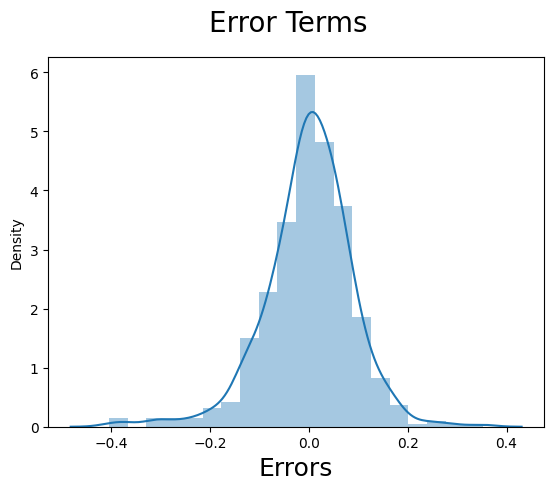

In [63]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_bike), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

###  Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.


#### Applying the scaling on the test sets

In [64]:
#Fit and transform train set
df_test[cont_var] = scaler.transform(df_test[cont_var])

In [65]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_great,weathersit_medium
count,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,...,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00
mean,0.48,0.04,0.70,0.56,0.53,0.64,0.31,0.52,0.26,0.26,...,0.08,0.09,0.13,0.12,0.15,0.16,0.16,0.10,0.65,0.03
std,0.50,0.19,0.46,0.23,0.22,0.15,0.16,0.22,0.44,0.44,...,0.28,0.28,0.33,0.32,0.35,0.37,0.37,0.30,0.48,0.16
min,0.00,0.00,0.00,0.05,0.03,0.26,-0.04,0.05,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.35,0.34,0.53,0.20,0.38,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,1.00,0.56,0.55,0.63,0.30,0.52,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,1.00,0.00,1.00,0.76,0.71,0.74,0.40,0.67,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
max,1.00,1.00,1.00,0.98,0.98,1.00,0.81,0.96,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


#### Dividing into X_test and y_test

In [66]:
y_test = df_test.pop('cnt')
X_test = df_test

In [67]:
# Creating X_test1 dataframe by selecting variables needed

X_test1 = X_test[['yr', 'workingday', 'atemp', 'hum', 'windspeed','season_spring', 'season_winter','mnth_jul','mnth_sept', 'weekday_sat', 'weathersit_great','weathersit_medium']]

In [68]:
# Adding constant variable to test dataframe
X_test1 = sm.add_constant(X_test1)

In [69]:
# Making predictions using the final model

y_pred1 = lr17.predict(X_test1)

In [72]:
# Finding r2
r2_score(y_true=y_test,y_pred=y_pred1)

0.8238810911805532

In [83]:
y_train_bike.shape
#y_pred1.shape

(510,)

In [87]:
#### finding out the mean squared error
import sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error 
train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_bike))
test_mse = (mean_squared_error(y_true=y_test,y_pred=y_pred1))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.008063816757206995
Mean squared error of the test set is 0.008364909904925697


### Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

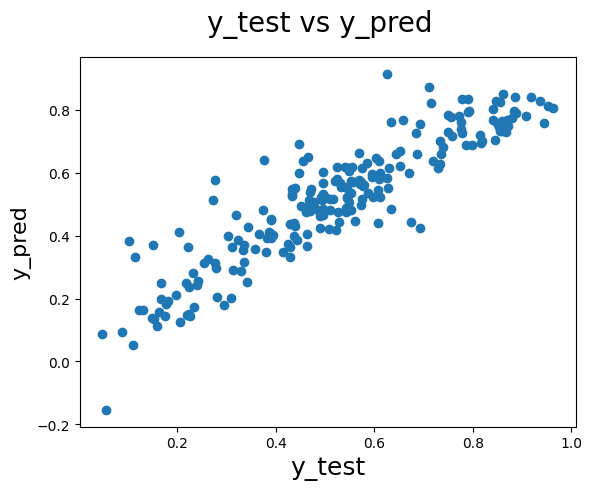

In [71]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred1)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      



We can see that the equation of our best fitted line is:

$ cnt = .23 + .23  \times\  yr + 0.05  \times  workingday + 0.5 \times atemp - 0.15 \times hum - 0.15 \times windspeed - 0.11 \times season_spring + 0.05 \times season_winter - 0.07 \times mnth_jul  + 0.06 \times mnth_sept + 0.06 \times weekday_sat + 0.0.06 \times waethersit_great - 0.19 \times weathersit_medium $


Overall we have a decent model, but we also acknowledge that we could do better. 

